# Ridge (L2) and Lasso (L1) regressions

I tested a little bit of Ridge and Lasso regressions

## Load DataSet

I used sklearn-dataset — boston

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
data.data = pd.DataFrame(data.data)
data.target = pd.DataFrame(data.target)

X = data.data
Y = data.target

Let's watch shapes!

In [2]:
print('Shape of X: {}'.format(X.shape))
print('Shape of Y: {}'.format(Y.shape))

Shape of X: (506, 13)
Shape of Y: (506, 1)


...and describe :)

In [3]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Let's check corr-matrix X and Y together

In [4]:
XY = pd.concat([X, Y], axis=1)

names = list(data.feature_names) 
names.append('Y')

corr = XY.corr()
corr.columns = names
corr['Y']

0    -0.388305
1     0.360445
2    -0.483725
3     0.175260
4    -0.427321
5     0.695360
6    -0.376955
7     0.249929
8    -0.381626
9    -0.468536
10   -0.507787
11    0.333461
12   -0.737663
0     1.000000
Name: Y, dtype: float64

Correlation X and Y is few negative and positive

Values are good (I think)

### Spliting set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [6]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape), end='\n\n')
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (379, 13)
Shape of y_train: (379, 1)

Shape of X_test: (127, 13)
Shape of y_test: (127, 1)


## Test nude models

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lin = LinearRegression()
rid = Ridge()
las = Lasso()

# =================================
# Function for fast getting results
# =================================

def simple_result(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('= {}'.format(type(model).__name__))
    print('– Train score: {:.2f}'.format(model.score(X_train, y_train)))
    print('– Test score: {:.2f}'.format(model.score(X_test, y_test)), end='\n\n')
    print('– Intercept: {:.2f}'.format(model.intercept_[0]), end='\n\n')
    print('– Coef\'s: \n{}'.format(model.coef_))
    print('\n==== ==== ==== ====\n')

simple_result(lin, X_train, X_test, y_train, y_test)
simple_result(rid, X_train, X_test, y_train, y_test)
simple_result(las, X_train, X_test, y_train, y_test)

= LinearRegression
– Train score: 0.77
– Test score: 0.64

– Intercept: 36.93

– Coef's: 
[[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
  -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
   2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
  -4.99116797e-01]]

==== ==== ==== ====

= Ridge
– Train score: 0.77
– Test score: 0.63

– Intercept: 31.85

– Coef's: 
[[-0.11478591  0.04541838 -0.03540308  2.30329133 -8.12744537  3.80634143
  -0.01428219 -1.33693873  0.21674809 -0.01175498 -0.90393728  0.00881273
  -0.50742473]]

==== ==== ==== ====

= Lasso
– Train score: 0.72
– Test score: 0.55

– Intercept: 44.73

– Coef's: 
[-0.05873776  0.04999404 -0.00158882  0.         -0.          0.761785
  0.01304661 -0.71010927  0.19551641 -0.01414771 -0.80524598  0.00709763
 -0.74214555]

==== ==== ==== ====



Ridge and Lasso makes our model few worse

But we can check features and find useless

If count of features is large —— Ridge and Lasso can make life simple better :3

## Watch at differece coef's of models

In [8]:
lin_coef = pd.DataFrame(lin.coef_).T
rid_coef = pd.DataFrame(rid.coef_).T
las_coef = pd.DataFrame(las.coef_)

names = ['Linear', 'Ridge', 'Lasso']

# ===========================
# Function for colorize table
# ===========================

def color_zero_red(val):
    color = 'rgba(255, 0, 0, 0.4)' if abs(val) == 0 else None
    return 'background-color: {}'.format(color)

all_coefs = pd.concat([lin_coef, rid_coef, las_coef], axis=1)
all_coefs.columns = names
all_coefs.index = data.feature_names
all_coefs.style.applymap(color_zero_red)

,Linear,Ridge,Lasso
CRIM,-0.117735,-0.114786,-0.0587378
ZN,0.0440175,0.0454184,0.049994
INDUS,-0.00576814,-0.0354031,-0.00158882
CHAS,2.39342,2.30329,0
NOX,-15.5894,-8.12745,-0
RM,3.76897,3.80634,0.761785
AGE,-0.00703518,-0.0142822,0.0130466
DIS,-1.43496,-1.33694,-0.710109
RAD,0.240081,0.216748,0.195516
TAX,-0.0112973,-0.011755,-0.0141477


Lasso chose 'CHAS' and 'NOX'

And we try to drop it and make test with nude models

In [9]:
data_droped = pd.DataFrame(data.data).drop([3,4], axis=1)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(data_droped, Y, random_state=0)

lin_d = LinearRegression()
rid_d = Ridge()
las_d = Lasso()

simple_result(lin_d, X_train_d, X_test_d, y_train_d, y_test_d)
simple_result(rid_d, X_train_d, X_test_d, y_train_d, y_test_d)
simple_result(las_d, X_train_d, X_test_d, y_train_d, y_test_d)

= LinearRegression
– Train score: 0.76
– Test score: 0.60

– Intercept: 25.95

– Coef's: 
[[-0.11724991  0.04624808 -0.05216921  3.97068831 -0.02161906 -1.23897775
   0.21004986 -0.01326482 -0.83982522  0.00987017 -0.51422215]]

==== ==== ==== ====

= Ridge
– Train score: 0.76
– Test score: 0.60

– Intercept: 26.27

– Coef's: 
[[-0.11709812  0.04644621 -0.05261644  3.92982399 -0.02132999 -1.23938646
   0.21089753 -0.01329317 -0.8410677   0.00984228 -0.51699914]]

==== ==== ==== ====

= Lasso
– Train score: 0.72
– Test score: 0.55

– Intercept: 44.73

– Coef's: 
[-0.05873776  0.04999404 -0.00158882  0.761785    0.01304661 -0.71010927
  0.19551641 -0.01414771 -0.80524598  0.00709763 -0.74214555]

==== ==== ==== ====



In [10]:
# ========================================================
# Function for itteration «alpha» in Ridge and Lasso model
# ========================================================

def loop_a_find(model, X_train, X_test, y_train, y_test, a_list=[1,10]):
    print('= {}'.format(type(model).__name__))
    for a in range(a_list[0],a_list[1]+1):
        model.set_params(alpha=a)
        model.fit(X_train, y_train)
        
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)
        
        print('a: {}'.format(a))
        print('Train score: {:.2f}'.format(score_train))
        print('Test score: {:.2f}\n'.format(score_test))

    print('== == == == ==\n')

In [11]:
rid_loop = Ridge()
las_loop = Lasso()

In [12]:
loop_a_find(rid_loop, X_train, X_test, y_train, y_test, a_list=[1, 10])
loop_a_find(rid_loop, X_train, X_test, y_train, y_test, a_list=[100, 100])
loop_a_find(rid_loop, X_train, X_test, y_train, y_test, a_list=[1000000, 1000000])

= Ridge
a: 1
Train score: 0.77
Test score: 0.63

a: 2
Train score: 0.77
Test score: 0.62

a: 3
Train score: 0.77
Test score: 0.62

a: 4
Train score: 0.76
Test score: 0.62

a: 5
Train score: 0.76
Test score: 0.62

a: 6
Train score: 0.76
Test score: 0.62

a: 7
Train score: 0.76
Test score: 0.61

a: 8
Train score: 0.76
Test score: 0.61

a: 9
Train score: 0.76
Test score: 0.61

a: 10
Train score: 0.76
Test score: 0.61

== == == == ==

= Ridge
a: 100
Train score: 0.75
Test score: 0.59

== == == == ==

= Ridge
a: 1000000
Train score: 0.31
Test score: 0.14

== == == == ==



In [13]:
loop_a_find(las_loop, X_train, X_test, y_train, y_test, a_list=[1, 10])
loop_a_find(las_loop, X_train, X_test, y_train, y_test, a_list=[100, 100])
loop_a_find(las_loop, X_train, X_test, y_train, y_test, a_list=[1000000, 1000000])

= Lasso
a: 1
Train score: 0.72
Test score: 0.55

a: 2
Train score: 0.66
Test score: 0.49

a: 3
Train score: 0.64
Test score: 0.47

a: 4
Train score: 0.61
Test score: 0.46

a: 5
Train score: 0.60
Test score: 0.44

a: 6
Train score: 0.59
Test score: 0.44

a: 7
Train score: 0.58
Test score: 0.43

a: 8
Train score: 0.57
Test score: 0.42

a: 9
Train score: 0.56
Test score: 0.41

a: 10
Train score: 0.56
Test score: 0.40

== == == == ==

= Lasso
a: 100
Train score: 0.26
Test score: 0.12

== == == == ==

= Lasso
a: 1000000
Train score: 0.00
Test score: -0.00

== == == == ==



If we upper «a» —— get worse models results (If it say simple)

## Intercept graph

Go make plot: changing intercept and checking intercept

_PS: Intercept —— is a in equation:_<br>

_Ỳ = a + b * Ẋ_

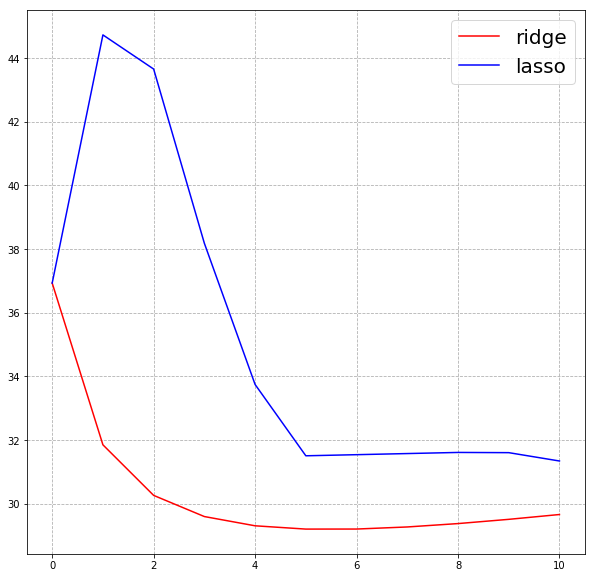

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import figure

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

a_ridge_list = []
a_lasso_list = []

for a in range(0,11):
    rid_int = Ridge(alpha=a).fit(X_train, y_train).intercept_[0]
    las_int = Lasso(alpha=a).fit(X_train, y_train).intercept_[0]
    
    a_ridge_list.append(rid_int)
    a_lasso_list.append(las_int)

figure(figsize=(10,10))

plt.plot(a_ridge_list, 'r', label='ridge')
plt.plot(a_lasso_list, 'b', label='lasso')
plt.grid(linestyle='--')
plt.legend(prop={'size': '20'})

![froggy](tenor.gif)